# Navigation

---
## Project  Navigation: REPORT

<img src="https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif">

### Introduction

This report provides a description of the implementation for the Deep Reinforcement Learning Nanodegree Project 1, where I had to train an agent to navigate (and collect bananas) in a large, square world. Please refer to the [README.md]() on this repository for more information

### Learning Algorithm 

1. **The Agent**:

    The agent architecture can be found on "**dqn_agent.py**" . This file implements an "Agent" class that holds:

    * args (class defined on the notebook): A set of parameters that will define the agent hyperparameters
    * state_size (int): dimension of each state
    * action_size (int): dimension of each action
    
     The agent uses 2 DQN policy networks to implement a Double DQN [3]**. As explained on Udacity's lectures, the idea of Double Q-learning is to reduce overestimations by decomposing the max operation in the target into action selection and action evaluation. Although not fully decoupled, the target network in the DQN architecture provides a natural candidate for the second value function, without having to introduce additional networks. On the referenced paper, they proposed to evaluate the greedy policy according to the online network, but using the target network to estimate its value. You'll see the details of this implementation mostly on the "learn" method of the Agent class.

    Last but not least for this initial simple project, **the agent also uses the Experience Replay.** Experience replay lets online reinforcement learning agents remember and reuse experiences from the past. In this project, experience transitions were uniformly sampled from a replay memory. However, this approach simply replays transitions/experiences at the same frequency that they were originally experienced, regardless of their significance. Including a priority or importance to these experiences will be implemented very soon following Prioritized Experience Replay [4]



 2. **The Policy network **:
        The agent's Neural Network (NN) used is implemented and described on "**model.py**". The model consists of N hidden layers, with relu activation function. Architecture of the hidden layer is flexibile and can be specified via a hyper-parameter from the dqn_agent.py module. 

3. **Hyper-parameters**:

    As described in (more details) the readme file the following hyper parameters are used in this algorithm.

     **n_episodes**. Maximum number of episodes for which training will proceed.<br>
     **max_t**. maximum number of steps per episode during training.<br>
     **eps_start, eps_end, eps_decay** - During the exploration using an episilon greedy policy is used. The policy starts with eps_start at episode 1 and decays by eps_decay each episode until it hits the eps_end floor.<br>
     **dqn_fc_layer** - architecture of the Hidden layers of the Q network. ex. = [ 64 64 32 256] means there are 4 hidden layers of 64, 64, 32 and 256 units, in that order.<br>
     **BUFFER_SIZE** -   # replay buffer size<br>
     **BATCH_SIZE**         # minibatch size<br>
     **GAMMA**            # discount factor<br>
     **TAU**              # for soft update of target parameters<br>
     **LR**               # learning rate <br>
     **UPDATE_EVERY**       # how often to update the network<br>
     **PRIORITY_EXPONENT**  # The raw priorities are raised to this exponent to have more uniform effect from all the experiences. Must be between 0 and 1.<br>



### Results

Three different agent has been trained. Please check the Navigation.ipynb notebook file for more details.

**DQN agent with random replay buffer (64 x 64 hidden fc layers as policy net)**

Surprisingly this base network trains the best i terms of average score and speed of convergence.

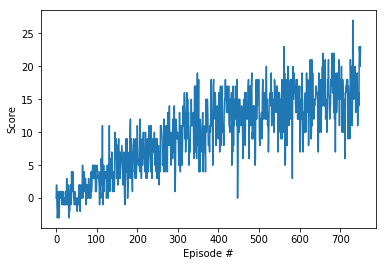

In the root directory following files contain the checkpointed model at various stage of the training. <br>
(RR stands for random replay). The number presiding the checkpoint signifies the episode number. <br>
RR600checkpoint.pth<br>
RR700checkpoint.pth<br>
RR751checkpoint.pth<br>

**DQN agent with random replay buffer (128 x 64 x 64 hidden fc layers as policy net)**

As this policy net was more complex it was not able to generalize as fast as the simpler network, although the difference between the two agents may not be statisticially significant. At least it does show the level of non-linearity in the environment can be captuted with two hidden units only.

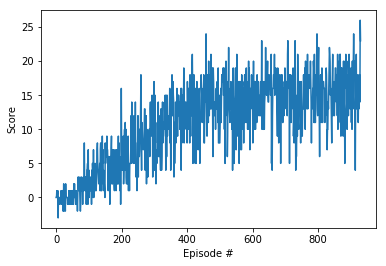

In the root directory following files contain the checkpointed model at various stage of the training.<br>
(LargeHiddenRR stands for random replay with Large hidden policy net).. The number presiding the checkpoint signifies the episode number. <br>
LargeHiddenRR500checkpoint.pth<br>
LargeHiddenRR600checkpoint.pth<br>
LargeHiddenRR700checkpoint.pth<br>
LargeHiddenRR800checkpoint.pth<br>
LargeHiddenRR900checkpoint.pth<br>
LargeHiddenRR931checkpoint.pth<br>

**DQN agent with prioritized replay buffer**

Proirty is proportional to the TD error for each experience. Importance sampling rate based update rate modification is not included due to time contraint, which may have been a significant factor for the underperformance of this agent. The trained agent briefly meets the objective and then diverges.

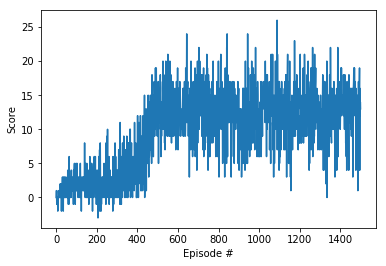

In the root directory following files contain the checkpointed model at various stage of the training.
(PR stands for prioritized replay). . The number presiding the checkpoint signifies the episode number. <br>

PR600checkpoint.pth<br>


### Future Work

All this results and conclusions suggest a series of changes (Future Work) to improve the agent's performance and to reduce it's instability. These series of changes must include:

* Dueling Network Architectures for Deep Reinforcement Learning [5]
* A Distributional Perspective on Reinforcement Learning [7]
* Study different and more complex NN' architectures applicable to the problem.
* Auto tune hyper paramaters and NN architectures 

Which will lead us to:

* Rainbow: Combining Improvements in Deep Reinforcement Learning [1]
* Playing Atari with Deep Reinforcement Learning [2]

### References

* [1] Rainbow: Combining Improvements in Deep Reinforcement Learning  (https://arxiv.org/abs/1710.02298)
* [2] Playing Atari with Deep Reinforcement Learning (http://arxiv.org/abs/1312.5602)
* [3]  Deep Reinforcement Learning with Double Q-learning (https://arxiv.org/abs/1509.06461)
* [4] Prioritized Experience Replay (https://arxiv.org/abs/1511.05952)
* [5] Dueling Network Architectures for Deep Reinforcement Learning
* [6] Reinforcement Learning: An Introduction (https://s3-us-west-1.amazonaws.com/udacity-drlnd/bookdraft2018.pdf)
* [7] A Distributional Perspective on Reinforcement Learning (https://arxiv.org/abs/1707.06887)
* [8]. Ray -rllib - A distributed framework for RL and hyperparameter tuning (https://ray.readthedocs.io/en/latest/rllib.html)
